# 2장 딥러닝

In [44]:
import pandas as pd
import numpy as np
import string
import os
import sys
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### 식사 항목의 가격 문제

In [45]:
# 계산대에서의 진짜 가격
p_fish = 150;p_chips = 50;p_ketchup = 100

In [46]:
# 식사 가격 샘플: 10일 동안의 식사 가격 일반화 데이터
np.random.seed(100)
portions = np.random.randint(low=1, high=10, size=3 )
portions
X = [];y = [];days=10
for i in range(days):
    portions = np.random.randint(low=1, high=10, size=3 )
    price = p_fish * portions[0] + p_chips * portions[1] + p_ketchup * portions[2]    
    X.append(portions)
    y.append(price)
    
X = np.array(X)
y = np.array(y)

In [47]:
print(X, y)

[[8 8 1]
 [5 3 6]
 [3 3 3]
 [2 1 9]
 [5 1 7]
 [3 5 2]
 [6 4 5]
 [5 4 8]
 [2 2 8]
 [8 1 3]] [1700 1500  900 1250 1500  900 1600 1750 1200 1550]


In [48]:
# 선형모형 만들기
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import Callback

In [49]:
price_guess = [np.array([[ 50 ], [   50], [  50 ]])]

In [50]:
model_input = Input(shape=(3,), dtype='float32')
model_output = Dense(1, activation='linear', use_bias=False, name='LinearNeuron', weights=price_guess)(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [51]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 LinearNeuron (Dense)        (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X, y, batch_size=20, epochs=30, verbose=2)
l4 = history.history['loss']

Epoch 1/30
1/1 - 0s - loss: 566500.0000 - 334ms/epoch - 334ms/step
Epoch 2/30
1/1 - 0s - loss: 38576.1914 - 5ms/epoch - 5ms/step
Epoch 3/30
1/1 - 0s - loss: 9320.0137 - 6ms/epoch - 6ms/step
Epoch 4/30
1/1 - 0s - loss: 6873.8545 - 4ms/epoch - 4ms/step
Epoch 5/30
1/1 - 0s - loss: 5998.2471 - 4ms/epoch - 4ms/step
Epoch 6/30
1/1 - 0s - loss: 5313.0713 - 6ms/epoch - 6ms/step
Epoch 7/30
1/1 - 0s - loss: 4722.4741 - 3ms/epoch - 3ms/step
Epoch 8/30
1/1 - 0s - loss: 4205.7593 - 4ms/epoch - 4ms/step
Epoch 9/30
1/1 - 0s - loss: 3750.5215 - 4ms/epoch - 4ms/step
Epoch 10/30
1/1 - 0s - loss: 3347.5742 - 4ms/epoch - 4ms/step
Epoch 11/30
1/1 - 0s - loss: 2989.7480 - 4ms/epoch - 4ms/step
Epoch 12/30
1/1 - 0s - loss: 2671.2874 - 4ms/epoch - 4ms/step
Epoch 13/30
1/1 - 0s - loss: 2387.4246 - 4ms/epoch - 4ms/step
Epoch 14/30
1/1 - 0s - loss: 2134.1440 - 7ms/epoch - 7ms/step
Epoch 15/30
1/1 - 0s - loss: 1907.9801 - 4ms/epoch - 4ms/step
Epoch 16/30
1/1 - 0s - loss: 1705.9332 - 4ms/epoch - 4ms/step
Epoch 17/3

In [53]:
model.get_layer('LinearNeuron').get_weights()

[array([[143.07005 ],
        [ 58.228096],
        [101.30583 ]], dtype=float32)]

dict_keys(['loss'])


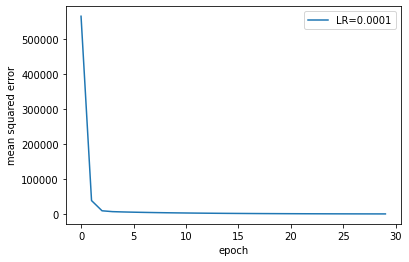

In [54]:
print(history.history.keys())
# plt.plot(l1)
# plt.plot(l2)
# plt.plot(l3)
plt.plot(l4)

plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(["LR=0.0001", "LR=0.001", "LR=0.01"])
plt.show()

- 케라스에서 XOR 문제

In [55]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [56]:
#XOR 는 선형으로 분리가능한 문제가 아니다.
#선형 모델에 비선형층을 추가하면 작동하지 않는다.


model_input = Input(shape=(2,), dtype='float32')
z = Dense(2,name='HiddenLayer', kernel_initializer='ones', activation='relu')(model_input)
#z = Activation('relu')(z)
z = Dense(1, name='OutputLayer')(z)
model_output = Activation('sigmoid')(z)
model = Model(model_input, model_output)
#model.summary()

In [57]:
sgd = SGD(lr=0.5)
#model.compile(loss="mse", optimizer=sgd)
model.compile(loss="binary_crossentropy", optimizer=sgd)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [58]:
model.fit(X, y, batch_size=4, epochs=200,verbose=0)
preds = np.round(model.predict(X),decimals=3)
pd.DataFrame({'Y_actual':list(y), 'Predictions':list(preds)})

,Y_actual,Predictions
0,[0],[0.129]
1,[1],[0.963]
2,[1],[0.963]
3,[0],[0.027]


In [59]:
model.get_weights()

[array([[2.0154455, 2.7379417],
        [2.0154455, 2.7379417]], dtype=float32),
 array([-0.02183903, -2.761427  ], dtype=float32),
 array([[ 2.5930507],
        [-4.4518275]], dtype=float32),
 array([-1.9115937], dtype=float32)]

In [60]:
hidden_layer_output = Model(inputs=model.input, outputs=model.get_layer('HiddenLayer').output)

In [61]:
projection = hidden_layer_output.predict(X)

In [62]:
for i in range(4):
    print(X[i], projection[i])

[0 0] [0. 0.]
[0 1] [1.9936064 0.       ]
[1 0] [1.9936064 0.       ]
[1 1] [4.009052  2.7144566]


In [63]:
import matplotlib.pyplot as plt

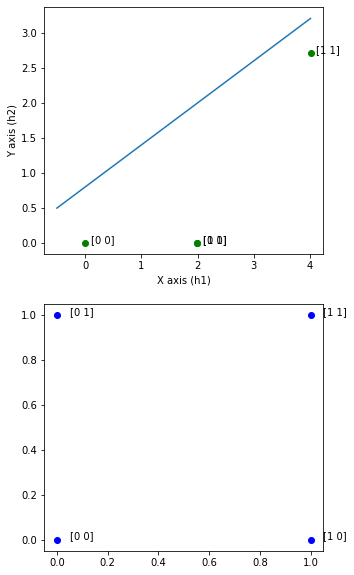

In [64]:
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(211)
plt.scatter(x=projection[:, 0], y=projection[:, 1], c=('g'))

ax.set_xlabel('X axis (h1)')
ax.set_ylabel('Y axis (h2)')
ax.set_label('Transformed Space')

# 입력을 선형으로 분리가능하게 변환하는 은닉층
x1, y1 = [projection[0, 0]-0.5, projection[3, 0]], [projection[0, 1]+0.5, projection[3, 1]+0.5]
plt.plot(x1, y1)
for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (projection[i, 0]+0.1, projection[i, 1]))
ax = fig.add_subplot(212)
ax.set_label('Original Space')
plt.scatter(x=X[:, 0], y=X[:, 1], c=('b'))
for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (X[i, 0]+0.05, X[i, 1]))

In [65]:
plt.show()

In [66]:
projection

array([[0.       , 0.       ],
       [1.9936064, 0.       ],
       [1.9936064, 0.       ],
       [4.009052 , 2.7144566]], dtype=float32)

In [67]:
# Logistic neuron: Logistic regression

In [68]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [69]:
X = data.data
y = data.target

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [71]:
X_train.shape

(398, 30)

In [72]:
model_input = Input(shape=(30, ), dtype='float32')
model_output = Dense(1, activation='sigmoid', name='SigmoidNeuron')(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [73]:
scaler = StandardScaler()
model.fit(scaler.fit_transform(X_train), y_train, batch_size=10, epochs=5,verbose=2,
          validation_data=(scaler.fit_transform(X_test), y_test))

Epoch 1/5
40/40 - 1s - loss: 0.4409 - accuracy: 0.8467 - val_loss: 0.3347 - val_accuracy: 0.9474 - 546ms/epoch - 14ms/step
Epoch 2/5
40/40 - 0s - loss: 0.2999 - accuracy: 0.9246 - val_loss: 0.2508 - val_accuracy: 0.9708 - 95ms/epoch - 2ms/step
Epoch 3/5
40/40 - 0s - loss: 0.2448 - accuracy: 0.9548 - val_loss: 0.2081 - val_accuracy: 0.9708 - 82ms/epoch - 2ms/step
Epoch 4/5
40/40 - 0s - loss: 0.2137 - accuracy: 0.9623 - val_loss: 0.1814 - val_accuracy: 0.9766 - 85ms/epoch - 2ms/step
Epoch 5/5
40/40 - 0s - loss: 0.1932 - accuracy: 0.9673 - val_loss: 0.1629 - val_accuracy: 0.9825 - 131ms/epoch - 3ms/step


In [74]:
!pip3 install -U scikit-learn

In [75]:
!pip3 install sklearn